# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Dimas Prayoga
- Email: dmsprayoga7@gmail.com
- Id Dicoding: dimas_prayoga_dx

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan performa penyewaan sepeda per bulan antara tahun 2011 dan 2012?

- Musim apa yang memiliki jumlah penyewaan sepeda paling rendah selama tahun 2011 hingga 2012?

- Cuaca apa yang memiliki jumlah penyewaan paling tinggi selama tahun 2011 hingga 2012?

- Bagaimana pola penyewaaan pelanggan casual dan registered per bulan pada tahun 2011 & 2012?

- Bagaimana pola penyewaan sepeda pada hari libur jika dibandingkan dengan hari kerja berdasarkan jam-nya?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

## Data Wrangling

### Gathering Data

Mengimpor Dataset `day.csv` dan `hour.csv` dari Github ke Colab

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dimasp-x/SubmissionDicodingData/main/hour.csv")
day_df = pd.read_csv("https://raw.githubusercontent.com/dimasp-x/SubmissionDicodingData/main/day.csv")

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Menilai tabel `day_df`

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print('Jumlah Missing Value :\n', day_df.isna().sum())

Jumlah Missing Value :
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print('Jumlah data duplicate :', day_df.duplicated().sum())

Jumlah data duplicate : 0


In [ ]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Menilai tabel `hour_df`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
print('Jumlah Missing Value :\n', hour_df.isna().sum())

Jumlah Missing Value :
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print('Jumlah data duplicate :', hour_df.duplicated().sum())

Jumlah data duplicate : 0


In [ ]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####Kesimpulan Assesment
Setelah menilai kedua data antara `day_df` dan `hour_df`, dapat disimpulkan bahwa data sudah bersih atau *clean*. Namun, proses *cleaning* akan tetap dijalankan.

### Cleaning Data

####Membersihkan tabel `day_df`

Duplicated Data

In [ ]:
day_df.duplicated().sum()

0

- Menghapus seluruh nilai *duplicate*

In [ ]:
day_df.drop_duplicates(inplace=True)

Missing Value

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Imputasi nilai-nilai yang hilang dapat diisi dengan nilai median atau rata-rata (*mean*)

In [ ]:
day_df.fillna(day_df.median(numeric_only=True), inplace=True)

In [ ]:
day_df.fillna(day_df.mean(numeric_only=True), inplace=True)

Innacurate Value

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Mengecek *outliers* pada kolom 'temp'

**Invers Normalisasi**, untuk mengetahui nilai asli dari temp, atemp, hum, dan windspeed. Hal ini dilakukan untuk menemukan nilai yang tidak akurat dan *outliers*

In [ ]:
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

In [ ]:
outlier_temp = day_df[(day_df['temp'] < -10) | (day_df['temp'] > 41)]

print("Nilai 'temp' yang tidak akurat:")
print(outlier_temp)

Nilai 'temp' yang tidak akurat:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Mentransform nilai pada kolom 'mnth' dan 'season' menjadi nilai sebenarnya yaitu nama-nama bulan dan musim agar memudahkan analisis

In [ ]:
# Membuat mapping untuk kolom 'mnth'
bulan_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

# Membuat mapping untuk kolom 'season'
musim_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['mnth'] = day_df['mnth'].map(bulan_mapping)

day_df['season'] = day_df['season'].map(musim_mapping)

day_df['yr'] = day_df['yr'].map({0: 2011, 1: 2012})

In [ ]:
print(day_df[['mnth', 'season', 'yr']])

         mnth  season    yr
0     Januari  Spring  2011
1     Januari  Spring  2011
2     Januari  Spring  2011
3     Januari  Spring  2011
4     Januari  Spring  2011
..        ...     ...   ...
726  Desember  Spring  2012
727  Desember  Spring  2012
728  Desember  Spring  2012
729  Desember  Spring  2012
730  Desember  Spring  2012

[731 rows x 3 columns]


####Membersihkan tabel `hour_df`

Duplicated Data

In [ ]:
hour_df.duplicated().sum()

0

- Menghapus seluruh nilai *duplicate*

In [ ]:
hour_df.drop_duplicates(inplace=True)

Missing Value

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Imputasi nilai-nilai yang hilang dapat diisi dengan nilai median atau rata-rata (*mean*)

In [ ]:
hour_df.fillna(hour_df.median(numeric_only=True), inplace=True)

In [ ]:
day_df.fillna(day_df.mean(numeric_only=True), inplace=True)

Innacurate Value

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Mengecek *outliers* pada kolom 'temp'

In [ ]:
outlier_temp = hour_df[(hour_df['temp'] < -10) | (hour_df['temp'] > 41)]

print("Nilai 'temp' yang tidak akurat:")
print(outlier_temp)

Nilai 'temp' yang tidak akurat:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


- Membersihkan nilai 'temp' yang tidak akurat

In [ ]:
hour_df['temp'] = hour_df['temp'].apply(lambda x: x if -10 <= x <= 41 else None)

**Invers Normalisasi**, untuk mengetahui nilai asli dari temp, atemp, hum, dan windspeed. Hal ini dilakukan untuk menemukan nilai yang tidak akurat dan *outliers*

In [ ]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

Mentransform nilai pada kolom 'mnth' dan 'season' menjadi nilai sebenarnya yaitu nama-nama bulan dan musim agar memudahkan analisis

In [ ]:
# Membuat mapping untuk kolom 'mnth'
bulan_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

# Membuat mapping untuk kolom 'season'
musim_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

hour_df['mnth'] = hour_df['mnth'].map(bulan_mapping)

hour_df['season'] = hour_df['season'].map(musim_mapping)

hour_df['yr'] = hour_df['yr'].map({0: 2011, 1: 2012})


In [ ]:
print(hour_df[['mnth','season', 'yr']])

           mnth  season    yr
0       Januari  Spring  2011
1       Januari  Spring  2011
2       Januari  Spring  2011
3       Januari  Spring  2011
4       Januari  Spring  2011
...         ...     ...   ...
17374  Desember  Spring  2012
17375  Desember  Spring  2012
17376  Desember  Spring  2012
17377  Desember  Spring  2012
17378  Desember  Spring  2012

[17379 rows x 3 columns]


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [ ]:
print('Apakah instant merupakan variabel yang unik? ', day_df.instant.is_unique)

Apakah instant merupakan variabel yang unik?  True


In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
361,362,2011-12-28,Spring,2011,Desember,0,3,1,1,12.264330,13.9987,50.3913,19.695387,255,2047,2302
554,555,2012-07-08,Fall,2012,Juli,0,0,0,1,33.722500,39.5198,57.3750,8.417143,1203,3469,4672
646,647,2012-10-08,Winter,2012,Oktober,1,1,0,2,15.716653,19.3804,70.9583,12.708493,874,4604,5478
396,397,2012-02-01,Spring,2012,Februari,0,3,1,1,19.235847,23.3269,50.7917,12.667489,304,4275,4579
142,143,2011-05-23,Summer,2011,Mei,0,1,1,2,25.898347,29.5148,81.0000,15.667414,836,3438,4274


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,Januari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000


- **Pivot table menggunakan kolom 'instant'**, untuk mengetahui jumlah penyewaan per-hari

In [ ]:
day_df.groupby(by='dteday').cnt.sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

- **Pivot table menggunakan kolom 'season' dan 'yr'**, untuk mengetahui total penyewaan sepeda pada `day_df` per musim pada tahun 2011(0) dan 2012(1). Dapat dilihat bahwa jumlah penyewaan tertinggi berada pada Musim Gugur(3) pada tahun 2012.

In [ ]:
day_df.groupby(by=['season', 'yr']).agg({
    "instant": "nunique",
    "cnt": "sum"
})

instant     cnt
season yr                   
Fall   2011       94  419650
       2012       94  641479
Spring 2011       90  150000
       2012       91  321348
Summer 2011       92  347316
       2012       92  571273
Winter 2011       89  326137
       2012       89  515476

- **Pivot table menggunakan kolom 'weekday', 'workingday', 'holiday'**, untuk mengetahui total penyewaan sepeda pada `day_df` untuk setiap kombinasi dari kolom tersebut. Dapat dilihat bahwa jumlah penyewaan tertinggi ada pada hari Kamis(4) yang merupakan hari kerja.

In [ ]:
day_df.groupby(by=['weekday', 'workingday', 'holiday']).agg({
    "instant": "nunique",
    "cnt": "sum"
})

instant     cnt
weekday workingday holiday                 
0       0          0            105  444027
1       0          1             15   59605
        1          0             90  395898
2       0          1              1    1013
        1          0            103  468096
3       0          1              1    7403
        1          0            103  465645
4       0          1              2    3920
        1          0            102  481475
5       0          1              2    6494
        1          0            102  481296
6       0          0            105  477807

- **Pivot table menggunakan kolom 'weathersit'**, untuk mengetahui total penyewaan sepeda pada `day_df` untuk setiap cuaca pada tahun 2011 dan 2012

In [ ]:
day_df.groupby(by=['weathersit','yr']).agg({
    "instant": "nunique",
    "cnt": "sum"
})

instant      cnt
weathersit yr                    
1          2011      226   835067
           2012      237  1422885
2          2011      124   382924
           2012      123   613934
3          2011       15    25112
           2012        6    12757

- Pivot table untuk mengetahui jumlah customer casual dan registered dari tiap musim dan tahun pada `day_df`

In [ ]:
pd.pivot_table(day_df, values=['casual', 'registered'], index=['season', 'yr'], aggfunc='sum')

casual  registered
season yr                      
Fall   2011   95450      324200
       2012  130641      510838
Spring 2011   21425      128575
       2012   39197      282151
Summer 2011   77564      269752
       2012  125958      445315
Winter 2011   52813      273324
       2012   76969      438507

###Explore `hour_df`

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14902,14903,2012-09-18,Fall,2012,September,3,0,2,1,2,25.42,27.275,94.0,19.0012,0,6,6
2824,2825,2011-05-02,Summer,2011,Mei,14,0,1,1,1,26.24,30.305,69.0,15.0013,48,133,181
1568,1569,2011-03-10,Spring,2011,Maret,19,0,4,1,3,18.04,21.970,0.0,39.0007,5,51,56
5002,5003,2011-08-01,Fall,2011,Agustus,8,0,1,1,1,32.80,36.365,43.0,12.9980,35,347,382
1970,1971,2011-03-27,Summer,2011,Maret,22,0,0,0,1,10.66,12.880,41.0,11.0014,5,25,30


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Januari,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Januari,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Januari,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Januari,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Januari,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,Mei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,2012.000000,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,2012.000000,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000


- **Pivot table menggunakan kolom 'dteday'**, untuk mengetahui jumlah penyewaan per-hari pada `hour_df`

In [ ]:
hour_df.groupby(by='dteday').cnt.sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

- **Pivot table menggunakan kolom 'weathersit'**, untuk mengetahui total penyewaan sepeda pada `hour_df` dengan kombinasi cuaca dan jam. Dapat dilihat bahwa penyewaan sepeda terbanyak ada pada cuaca Cerah pada pukul 17.00.

In [ ]:
hour_df.groupby(by=['weathersit','hr']).agg({
    "instant": "nunique",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

instant     cnt
weathersit hr                 
1          17      507  253718
           18      500  229220
           16      510  171230
           19      509  171073
           8       440  158998
...                ...     ...
3          3        54     375
           4        57     267
4          18        1     164
           16        1      36
           1         1      23

[75 rows x 2 columns]

- Pivot table untuk mengetahui jumlah customer casual dan registered dari tiap musim dan tahun pada `hour_df`

In [ ]:
pd.pivot_table(hour_df, values=['casual', 'registered'], index=['season', 'yr'], aggfunc='sum')

casual  registered
season yr                      
Fall   2011   95450      324200
       2012  130641      510838
Spring 2011   21425      128575
       2012   39197      282151
Summer 2011   77564      269752
       2012  125958      445315
Winter 2011   52813      273324
       2012   76969      438507

###Explore all data

Menggabungkan `day_df` dan `hour_df`, karena kolom season, mnth, holiday, weekday, workingday memiliki nilai yang sama maka hanya akan menambahkan beberapa kolom dari `hour_df`

In [ ]:
all_df = pd.merge(day_df, hour_df[['instant','dteday', 'hr','weathersit','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
, on='dteday', how='left', suffixes=('_day', '_hour'))

In [ ]:
all_df.head()

,instant_day,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit_day,temp_day,...,instant_hour,hr,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,Spring,2011,Januari,0,6,0,2,14.110847,...,1,0,1,9.84,14.395,81.0,0.0,3,13,16
1,1,2011-01-01,Spring,2011,Januari,0,6,0,2,14.110847,...,2,1,1,9.02,13.635,80.0,0.0,8,32,40
2,1,2011-01-01,Spring,2011,Januari,0,6,0,2,14.110847,...,3,2,1,9.02,13.635,80.0,0.0,5,27,32
3,1,2011-01-01,Spring,2011,Januari,0,6,0,2,14.110847,...,4,3,1,9.84,14.395,75.0,0.0,3,10,13
4,1,2011-01-01,Spring,2011,Januari,0,6,0,2,14.110847,...,5,4,1,9.84,14.395,75.0,0.0,0,1,1


In [ ]:
all_df.groupby(by=["season", "yr"]).agg({
    "casual_hour": ["min", "max", "sum"],
    "registered_hour": ["min", "max", "sum"],
    "casual_day": ["min", "max"],
    "registered_day": ["min", "max"]
})

casual_hour              registered_hour              casual_day  \
                    min  max     sum             min  max     sum        min   
season yr                                                                      
Fall   2011           0  248   95450               0  567  324200        118   
       2012           0  350  130641               1  886  510838        371   
Spring 2011           0  175   21425               0  393  128575          9   
       2012           0  367   39197               1  681  282151          9   
Summer 2011           0  240   77564               0  555  269752        121   
       2012           0  361  125958               0  782  445315        120   
Winter 2011           0  272   52813               1  553  273324         50   
       2012           0  362   76969               0  876  438507          2   

                  registered_day        
              max            min   max  
season yr                               
Fall   2011  3065            889  4614  
       2012  3160           3195  6917  
Spring 2011  1424            416  2841  
       2012  3155            432  5315  
Summer 2011  2355            674  4414  
       2012  3410            907  6456  
Winter 2011  2397            570  4372  
       2012  3031             20  6946

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan performa penyewaan sepeda per bulan antara tahun 2011 dan 2012?





- Membuat dataframe `total_per_bulan` dengan menggunakan groupby, kemudian mengurutkan variabel bulan dan tahunnya untuk memudahkan analisis.

In [ ]:
total_per_bulan = all_df.groupby(by=['mnth','yr']).cnt_hour.sum().reset_index()

total_per_bulan['mnth'] = pd.Categorical(total_per_bulan['mnth'], categories=[
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
], ordered=False)

total_per_bulan = total_per_bulan.sort_values(by=['yr', 'mnth'])
print(total_per_bulan)

         mnth    yr  cnt_hour
8     Januari  2011     38189
6    Februari  2011     48215
14      Maret  2011     64045
2       April  2011     94870
16        Mei  2011    135821
12       Juni  2011    143512
10       Juli  2011    141341
0     Agustus  2011    136691
22  September  2011    127418
20    Oktober  2011    123511
18   November  2011    102167
4    Desember  2011     87323
9     Januari  2012     96744
7    Februari  2012    103137
15      Maret  2012    164875
3       April  2012    174224
17        Mei  2012    195865
13       Juni  2012    202830
11       Juli  2012    203607
1     Agustus  2012    214503
23  September  2012    218573
21    Oktober  2012    198841
19   November  2012    152664
5    Desember  2012    123713


In [ ]:
print(total_per_bulan.columns)

Index(['mnth', 'yr', 'cnt_hour'], dtype='object')


- Memisahkan data tahun 2011 dan 2012 dari `total_per_bulan`

In [ ]:
data_2011 = total_per_bulan[total_per_bulan['yr'] == 2011]
data_2012 = total_per_bulan[total_per_bulan['yr'] == 2012]

In [ ]:
print(data_2011.columns)
data_2011.head(12)

Index(['mnth', 'yr', 'cnt_hour'], dtype='object')


,mnth,yr,cnt_hour
8,Januari,2011,38189
6,Februari,2011,48215
14,Maret,2011,64045
2,April,2011,94870
16,Mei,2011,135821
12,Juni,2011,143512
10,Juli,2011,141341
0,Agustus,2011,136691
22,September,2011,127418
20,Oktober,2011,123511


In [ ]:
print(data_2012.columns)
data_2012.head(12)

Index(['mnth', 'yr', 'cnt_hour'], dtype='object')


,mnth,yr,cnt_hour
9,Januari,2012,96744
7,Februari,2012,103137
15,Maret,2012,164875
3,April,2012,174224
17,Mei,2012,195865
13,Juni,2012,202830
11,Juli,2012,203607
1,Agustus,2012,214503
23,September,2012,218573
21,Oktober,2012,198841


- Membuat line chart untuk membandingkan total penyewaan per bulan antara tahun 2011 dan 2012

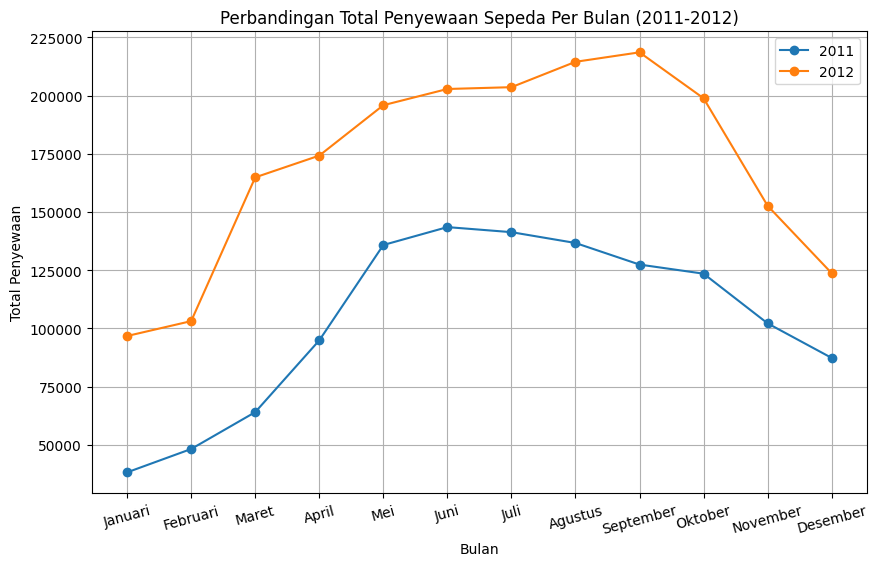

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data_2011['mnth'], data_2011['cnt_hour'], label='2011', marker='o')
plt.plot(data_2012['mnth'], data_2012['cnt_hour'], label='2012', marker='o')


plt.title('Perbandingan Total Penyewaan Sepeda Per Bulan (2011-2012)')
plt.xlabel('Bulan')
plt.xticks(rotation=15)
plt.ylabel('Total Penyewaan')

plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2: Musim apa yang memiliki jumlah penyewaan sepeda paling rendah selama tahun 2011 hingga 2012?



- Membuat dataframe `total_per_musim` untuk memudahkan analisis

In [ ]:
total_per_musim = all_df.groupby('season')['cnt_hour'].sum().reset_index()
total_per_musim.head()

,season,cnt_hour
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


- Membuat diagram batang atau bar plot sebagai visualisasi dari `total_per_musim`

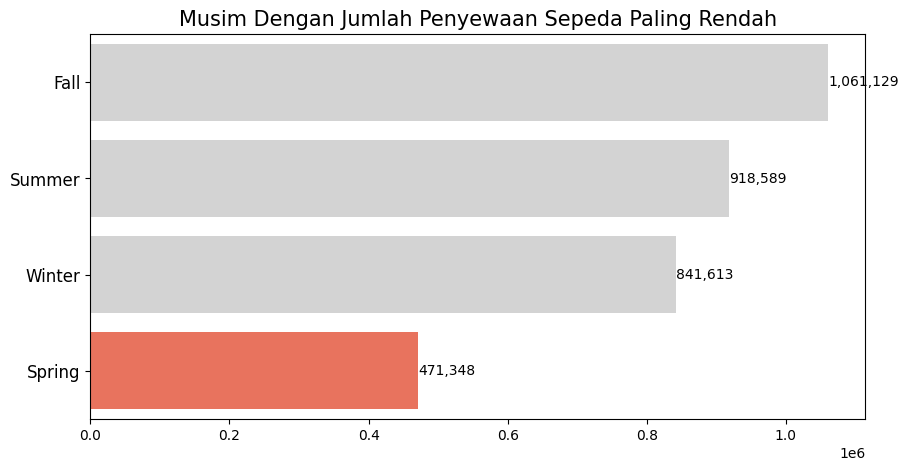

In [ ]:
plt.figure(figsize=(10, 5))

total_per_musim_sorted = total_per_musim.sort_values(by="cnt_hour", ascending=False)

colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#FF6347"]

ax = sns.barplot(x="cnt_hour", y="season", data=total_per_musim_sorted, palette=colors_)

for index, value in enumerate(total_per_musim_sorted["cnt_hour"]):
    ax.text(value, index, f'{value:,}', ha='left', va='center', fontsize=10, color='black')

plt.title("Musim Dengan Jumlah Penyewaan Sepeda Paling Rendah", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

plt.show()

### Pertanyaan 3:  Cuaca apa yang memiliki jumlah penyewaan paling tinggi selama tahun 2011 hingga 2012?


- Membuat dataframe `total_per_cuaca` untuk memudahkan analisis

In [ ]:
total_per_cuaca = all_df.groupby('weathersit_hour')['cnt_hour'].sum().reset_index()
total_per_cuaca.head()

,weathersit_hour,cnt_hour
0,1,2338173
1,2,795952
2,3,158331
3,4,223


- Membuat bar plot sebagai visualisasi dari `total_per_cuaca`

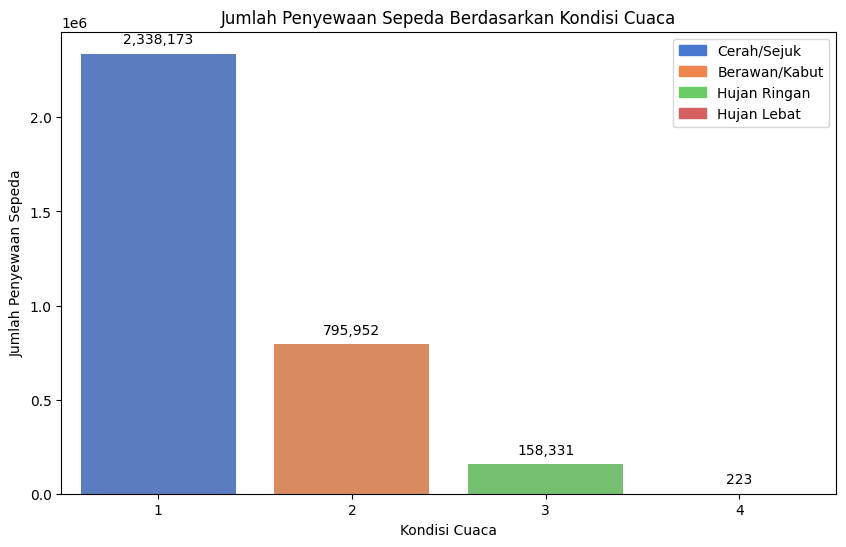

In [ ]:
plt.figure(figsize=(10, 6))

total_per_cuaca_sorted = total_per_cuaca.sort_values(by='cnt_hour')

palette = sns.color_palette("muted")

ax = sns.barplot(x='weathersit_hour', y='cnt_hour', data=total_per_cuaca_sorted, palette=palette)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

legend_labels = {
    1: "Cerah/Sejuk",
    2: "Berawan/Kabut",
    3: "Hujan Ringan",
    4: "Hujan Lebat"
}

handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels.values(), loc="upper right")

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 4 : Bagaimana pola penyewaaan pelanggan casual dan registered per bulan pada tahun 2011 & 2012?

- Menyiapkan data yang diperlukan dan membuat dataframe `cust_per_bulan` untuk memudahkan analisis

In [ ]:
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

cust_per_bulan = all_df.resample(rule='M', on='dteday').agg({
    "casual_hour": "sum",
    "registered_hour": "sum"
})

cust_per_bulan.index = cust_per_bulan.index.strftime('%B %Y')

- Memisahkan data tahun 2011 dan 2012 dari dataframe `cust_per_bulan`

In [ ]:
data_2011 = cust_per_bulan[cust_per_bulan.index.str.contains('2011')]
data_2012 = cust_per_bulan[cust_per_bulan.index.str.contains('2012')]

- Membuat double bar plot untuk pola penyewaan pelanggan casual dan registered per bulan (Tahun 2011)

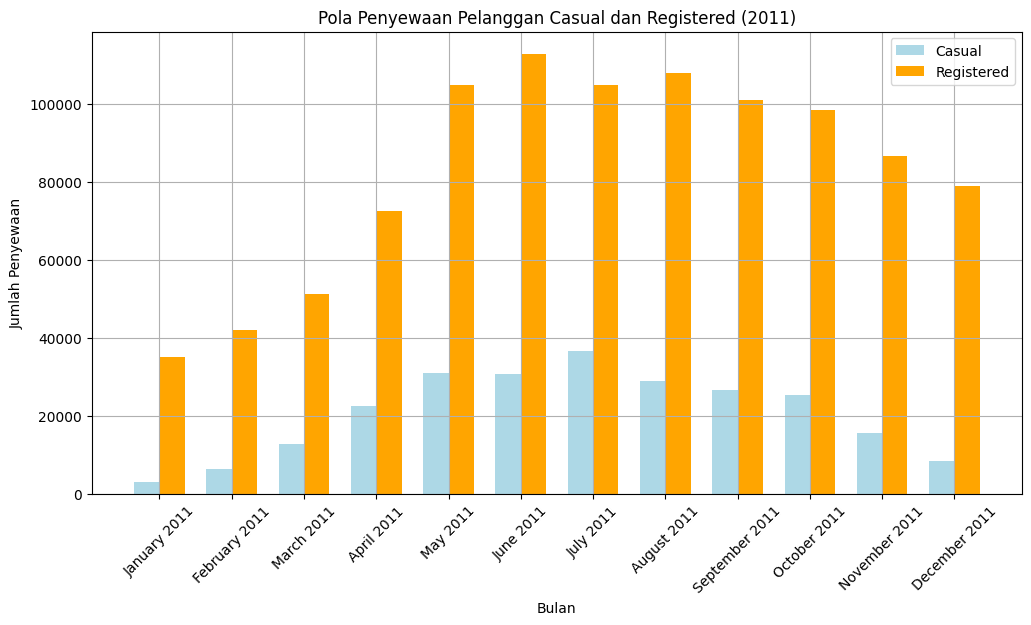

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index_2011 = range(len(data_2011))

plt.bar(index_2011, data_2011['casual_hour'], width=bar_width, label='Casual', color='lightblue')
plt.bar([i + bar_width for i in index_2011], data_2011['registered_hour'], width=bar_width, label='Registered', color='orange')

plt.title('Pola Penyewaan Pelanggan Casual dan Registered (2011)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([i + bar_width/2 for i in index_2011], data_2011.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

- Membuat double bar plot untuk pola penyewaan pelanggan casual dan registered per bulan (Tahun 2012)

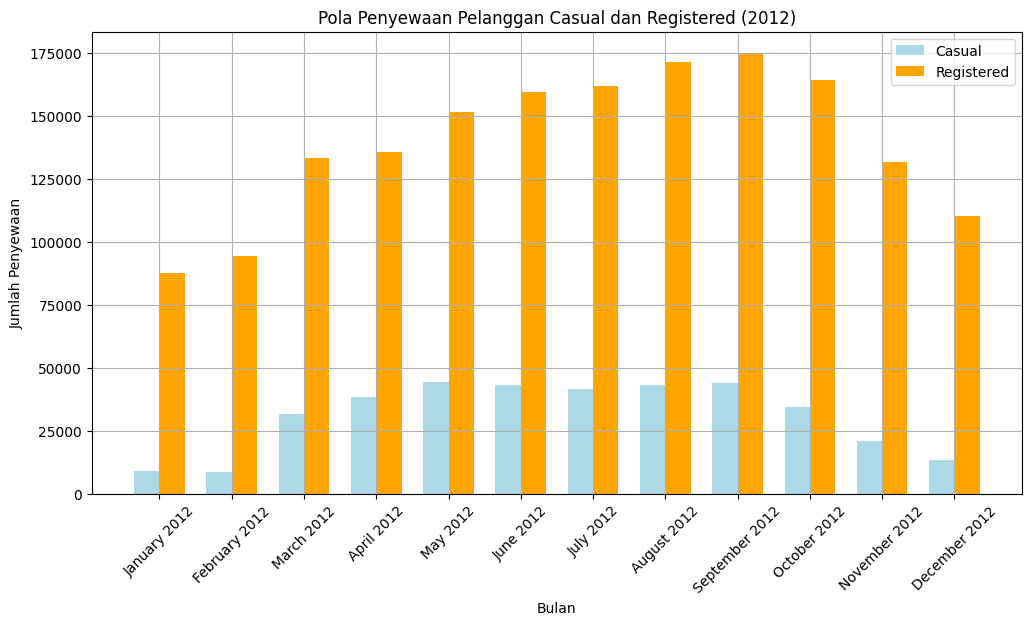

In [ ]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index_2012 = range(len(data_2012))

plt.bar(index_2012, data_2012['casual_hour'], width=bar_width, label='Casual', color='lightblue')
plt.bar([i + bar_width for i in index_2012], data_2012['registered_hour'], width=bar_width, label='Registered', color='orange')

plt.title('Pola Penyewaan Pelanggan Casual dan Registered (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([i + bar_width/2 for i in index_2012], data_2012.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 5 : Bagaimana pola penyewaan sepeda pada hari libur jika dibandingkan dengan hari kerja berdasarkan jam-nya?


- Memisahkan dan memilih kolom yang diperlukan

In [ ]:
selected_columns = ['holiday', 'hr', 'cnt_hour']
df_selected = all_df[selected_columns]

- Membuat visualisasinya dengan memisahkan data antara hari libur dan hari kerja

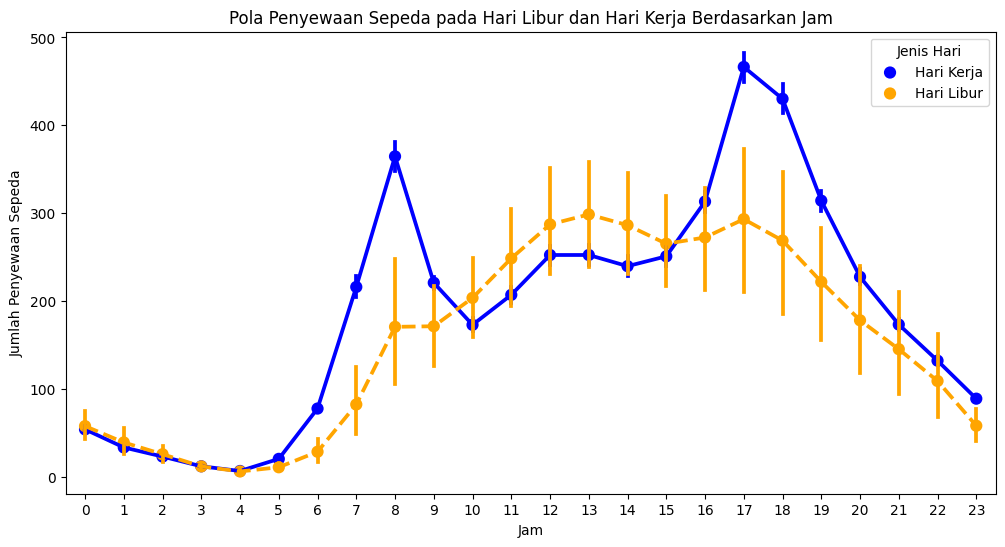

In [ ]:
plt.figure(figsize=(12, 6))

df_holiday = df_selected[df_selected['holiday'] == 1]
df_workday = df_selected[df_selected['holiday'] == 0]

sns.pointplot(data=df_workday, x='hr', y='cnt_hour', color='blue', markers=['o'], linestyles=['-'], label='Hari Kerja')
sns.pointplot(data=df_holiday, x='hr', y='cnt_hour', color='orange', markers=['o'], linestyles=['--'], label='Hari Libur')

plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Pola Penyewaan Sepeda pada Hari Libur dan Hari Kerja Berdasarkan Jam')
plt.legend(title='Jenis Hari')
plt.show()

### Analisis Lanjutan : Linear Regression

- Import library untuk Analisis Regresi

In [ ]:
import statsmodels.api as sm

- Fitur yang akan digunakan untuk membuat model regresi linier merupakan 'temp_hour', 'atemp_hour', 'hum_hour', dan  'windspeed_hour'. Fitur 'cnt_hour' adalah variabel dependen.

In [ ]:
X = all_df[['temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour']]
y = all_df['cnt_hour']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               cnt_hour   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     1474.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:36:06   Log-Likelihood:            -1.1250e+05
No. Observations:               17379   AIC:                         2.250e+05
Df Residuals:                   17374   BIC:                         2.251e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            161.8069      6.506     24.

- Membuat visualisasi model regresi dengan Residual Plot

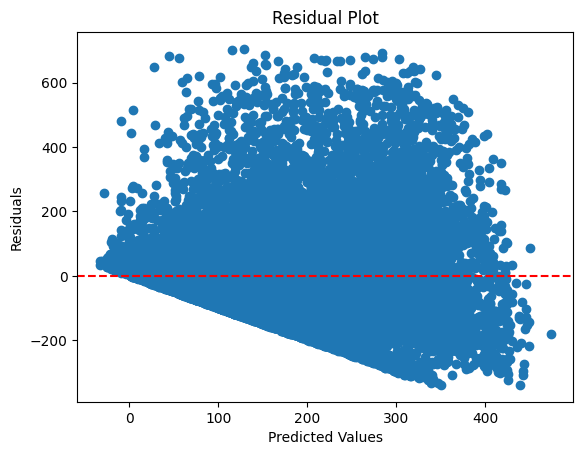

In [ ]:
plt.scatter(model.predict(), model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Conclusion

- **Conclution pertanyaan 1** : Berdasarkan grafik yang disajikan, terlihat adanya peningkatan secara umum pada tahun 2012 dibandingkan dengan tahun 2011. Namun, pola menunjukkan adanya penurunan jumlah penyewaan di akhir dan awal tahun, sementara terdapat peningkatan yang signifikan pada bulan Februari dan seterusnya. Hal ini diharapkan dapat membantu memahami tren serta menjadi tambahan pertimbangan pengambilan keputusan misalnya dalam menyesuaikan stok, personel, dan sumber daya lainnya sesuai dengan permintaan yang diharapkan.

- **Conclution pertanyaan 2** : Berdasarkan hasil analisis, musim dengan total penyewaan sepeda paling rendah adalah Musim Semi (Spring) dengan total penyewaan 471,348, yang memiliki perbedaan cukup jauh dengan musim lainnya. Oleh karena itu, disarankan untuk memperhatikan faktor-faktor yang mungkin memengaruhi preferensi pelanggan selama Musim Semi dan mengambil langkah-langkah strategis untuk meningkatkan kinerja penyewaan selama periode ini.

- **Conclution pertanyaan 3** : Berdasarkan grafik batang yang telah ditampilkan, jumlah penyewaan tertinggi terjadi pada cuaca cerah/sejuk, dengan perbedaan yang cukup jauh dibandingkan dengan kondisi cuaca lainnya, yaitu lebih dari 2 juta penyewaan. Dalam rangka meningkatkan kenyamanan dan keamanan pelanggan, disarankan untuk memberikan penekanan khusus pada penyediaan layanan pada kondisi cuaca tersebut, mungkin dengan menawarkan promosi khusus atau program loyalitas untuk meningkatkan minat penyewaan saat kondisi cuaca yang lebih baik.

- **Conclution pertanyaan 4** : Berdasarkan kedua grafik pola penyewaan customer casual dan registered di atas, terdapat perbedaan yang signifikan antara pelanggan casual dan registered. Namun, memiliki pola yang hampir sama antara tahun 2011 dan 2012, yaitu memiliki jumlah penyewaan tertinggi pada pertengahan hingga akhir tahun. Untuk meningkatkan pemanfaatan layanan, disarankan untuk memahami lebih lanjut preferensi dan kebutuhan khusus dari kedua kelompok pelanggan, sehingga strategi pemasaran dan promosi dapat disesuaikan untuk mencapai pertumbuhan yang lebih baik.

- **Conclution pertanyaan 5** : Jika dilihat pada grafik yang telah ditampilkan, pada hari kerja jumlah penyewaan tertinggi ada pada pukul 8 pagi dan 5 sore yang merupakan waktu berangkat dan pulang kerja/aktivitas, hasil tersebut juga memiliki confidence interval yang relatif kecil. Sedangkan, pada hari libur jumlah penyewaan tertinggi ada pada pukul 1 siang dan 6 sore, tetapi memiliki confidence interval yang cukup tinggi yang menunjukkan ketidakpastian dalam estimasi rata-rata waktu tersebut. Sebagai saran, dapat dipertimbangkan untuk memperkuat promosi atau penawaran spesial pada jam-jam tertentu di hari kerja, terutama pada pukul 8 pagi dan 5 sore, untuk menarik lebih banyak pelanggan. Selain itu, pada hari libur, upayakan untuk meningkatkan ketepatan estimasi rata-rata pada pukul 1 siang dan 6 sore dengan memperbaiki atau menyesuaikan strategi pemasaran agar dapat menarik minat pelanggan pada waktu-waktu tersebut.

- **Conclution Analisis Linear Regression**, Hasil analisis regresi di atas memberikan informasi tentang sejauh mana model regresi linear mampu menjelaskan variasi dalam variabel dependen (cnt_hour).
  - R-squared adalah ukuran seberapa baik variabilitas variabel dependen dapat dijelaskan oleh model. Nilai 0.253 berarti sekitar 25.3% dari variasi dalam jumlah penyewaan sepeda (cnt_hour) dapat dijelaskan oleh model regresi ini.
  - Ketika suhu (temp_hour) naik 1 unit, jumlah penyewaan sepeda (cnt_hour) cenderung meningkat sebanyak 2.0872 unit.
  - Ketika suhu perasaan (atemp_hour) naik 1 unit, jumlah penyewaan sepeda (cnt_hour) cenderung meningkat sebanyak 6.2869 unit.
  - Ketika kelembapan (hum_hour) naik 1 unit, jumlah penyewaan sepeda (cnt_hour) cenderung menurun sebanyak 2.7518 unit.
  - Ketika kecepatan angin (windspeed_hour) naik 1 unit, jumlah penyewaan sepeda (cnt_hour) cenderung meningkat sebanyak 0.6415 unit.

  Kesimpulannya, model regresi ini memiliki R-squared sekitar 25.3%, yang artinya variabel independen yang digunakan mampu menjelaskan sebagian kecil variasi dalam jumlah penyewaan sepeda. Variabel suhu, suhu perasaan, kelembapan, dan kecepatan angin tampaknya memiliki pengaruh signifikan pada jumlah penyewaan sepeda berdasarkan koefisien regresi yang dihasilkan.